In [117]:
from tqdm import tqdm
import wandb
api = wandb.Api(timeout=180)
import os
import pandas as pd
import wandb
import yaml
from pathlib import Path
from copy import deepcopy
import torch
import matplotlib.pyplot as plt
import numpy as np
import argparse
import itertools
import  matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools
import time
import matplotlib as mpl
import matplotlib.ticker as ticker

In [118]:
USER='wilderlavington' 
PROJECT='FunctionalOptimizationFinal'
SUMMARY_FILE='FuncOptMujoco.csv'  
try:
    os.makedirs("plots/aistats/")
except FileExistsError:
    print("File already exists")

File already exists


In [119]:
%run plotting_utils.py

In [120]:
def download_wandb_summary(user, project, summary_file):
    """
    Download a summary of all runs on the wandb project
    """
    runs = api.runs(user+'/'+project, per_page=1e7)
    summary_list, config_list, name_list, id_list, commits = [], [], [], [], []
    assert len([run for run in runs])
    for run in tqdm(runs):
        try:
            run = api.run(user+'/'+project+"/"+run.id)
        except:
            continue
        conf = {k: v for k, v in run.config.items()}  
        if 'env_name' in conf.keys(): 
            summary_list.append(run.summary._json_dict)
            config_list.append(conf)
            name_list.append(run.name)
            id_list.append(run.id)
            if run.commit is not None:
                commits.append(run.commit)
            else:
                commits.append('None')
        else:
            pass
    assert len(summary_list)
    commits_df = pd.DataFrame.from_records(commits)
    summary_df = pd.DataFrame.from_records(summary_list)
    config_df = pd.DataFrame.from_records(config_list)
    name_df = pd.DataFrame({"name": name_list, "id": id_list})
    all_df = pd.concat([name_df, config_df, summary_df, commits_df], axis=1)
    Path('logs/wandb_data/').mkdir(parents=True, exist_ok=True)
    all_df.to_csv('logs/wandb_data/'+summary_file)
    return all_df
#

In [121]:
download_wandb_summary(user=USER, project=PROJECT, summary_file=SUMMARY_FILE)

100%|███████████████████████████████████████| 8605/8605 [25:58<00:00,  5.52it/s]


,name,id,c,m,algo,beta,cuda,loss,seed,clamp,group,entity,l2_reg,log_lr,nonlin,epsilon,outer_c,project,use_sgd,env_name,episodes,bandwidth,ftrl_clip,loss_type,max_procs,use_exact,add_l2_reg,log_lambda,model_type,static_cov,beta_update,expert_mode,expert_type,hidden_size,kernel_type,replay_size,dataset_name,eta_schedule,expand_coeff,ftrl_variant,log_inner_lr,log_interval,log_outer_lr,offline_wandb,multi_seed_run,transform_dist,mini_batch_size,sls_beta_update,epochs_per_update,outer_beta_update,trust_region_type,inner_policy_optim,samples_per_update,use_optimal_stepsize,stochastic_interaction,label,update,log_policy_loss,avg_optimal_regret,log_inclass_regret,optimal_return,eta,beta,_wandb,_timestamp,expert_loss,policy_loss,policy_return,log_optimal_regret,_runtime,avg_inclass_regret,log_avg_optimal_regret,total_examples,_step,grad_norm,sso_ogd_loss,expert_return,inclass_regret,inclass_return,optimal_regret,log_avg_inclass_regret,ogd_loss,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,deft-puddle-6657,2mv7d3x0,0.1,100,SSO_OGD,1,1,MSELoss,132,0,static-args,wilderlavington,10,0,relu,1.000000e-08,0.1,FunctionalOptimizationFinal,1,Hopper-v2,50,0,0.15,l2,0,0,0,-5.5,nn,0,1,0,sac,2048,rbf,100000,Mujoco,constant,2,Strongly-Convex,-4,1,-4,0,3,1,2048,0.9,1000,0.9,l2,Adagrad,1000,1,1,NaN,51.0,5.255583,0.279418,4.464777,3444.178241,1.0,1.0,{'runtime': 605},1.666296e+09,2.184288e-10,191.633148,397.830393,9.564536,603.000000,-7.116159,-1.275045,51000.0,51.0,7.530550e-09,0.057025,3454.904400,-3.629241e+05,851.271000,14250.334961,4.464777,NaN,b,3,f,4,6,6,c,d,0,e,e,7,9,1,e,0,5,0,9,e,e,b,3,6,b,4,f,3,f,1,c,d,5,b,b,8,1,5,e,e
1,morning-cherry-6655,1z85l0bf,0.1,10,SSO_OGD,1,1,MSELoss,132,0,static-args,wilderlavington,10,0,relu,1.000000e-08,0.1,FunctionalOptimizationFinal,1,Hopper-v2,50,0,0.15,l2,0,0,0,-5.5,nn,0,1,0,sac,2048,rbf,100000,Mujoco,constant,2,Strongly-Convex,-4,1,-4,0,3,1,2048,0.9,1000,0.9,l2,Adagrad,1000,1,1,NaN,51.0,5.861133,0.373114,NaN,3450.530867,1.0,1.0,{'runtime': 556},1.666296e+09,2.352323e-10,351.121826,337.735959,9.853710,554.000000,-6.613930,-0.985870,51000.0,51.0,3.661103e-08,0.079763,3454.904400,-3.373104e+05,941.090053,19028.828125,NaN,NaN,b,3,f,4,6,6,c,d,0,e,e,7,9,1,e,0,5,0,9,e,e,b,3,6,b,4,f,3,f,1,c,d,5,b,b,8,1,5,e,e
2,wild-durian-6641,2etypk2e,0.1,10,SSO_OGD,1,1,MSELoss,12,0,static-args,wilderlavington,10,0,relu,1.000000e-08,0.1,FunctionalOptimizationFinal,1,Hopper-v2,50,0,0.15,l2,0,0,0,-5.5,nn,0,1,0,sac,2048,rbf,100000,Mujoco,constant,2,Strongly-Convex,-4,1,-4,0,3,1,2048,0.9,1000,0.9,l2,Adagrad,1000,1,1,NaN,51.0,5.678915,0.370788,NaN,3449.348717,1.0,1.0,{'runtime': 567},1.666296e+09,2.612673e-10,292.631775,480.353596,9.847455,566.000000,-6.104176,-0.992126,51000.0,51.0,2.159821e-08,0.102148,3454.904400,-3.113130e+05,991.969455,18910.162109,NaN,NaN,b,3,f,4,6,6,c,d,0,e,e,7,9,1,e,0,5,0,9,e,e,b,3,6,b,4,f,3,f,1,c,d,5,b,b,8,1,5,e,e
3,vivid-morning-6628,24e9u6yw,0.1,1,SSO_OGD,1,1,MSELoss,12,0,static-args,wilderlavington,10,0,relu,1.000000e-08,0.1,FunctionalOptimizationFinal,1,Hopper-v2,50,0,0.15,l2,0,0,0,-5.5,nn,0,1,0,sac,2048,rbf,100000,Mujoco,constant,2,Strongly-Convex,-4,1,-4,0,3,1,2048,0.9,1000,0.9,l2,Adagrad,1000,1,1,NaN,51.0,6.085185,0.490500,2.919103,3449.617996,1.0,1.0,{'runtime': 594},1.666296e+09,2.760069e-10,439.301208,161.888830,10.127251,593.000000,-6.147501,-0.712330,51000.0,51.0,6.180123e-07,0.115582,3454.904400,-3.135226e+05,124.207829,25015.500000,2.919103,NaN,b,3,f,4,6,6,c,d,0,e,e,7,9,1,e,0,5,0,9,e,e,b,3,6,b,4,f,3,f,1,c,d,5,b,b,8,1,5,e,e
4,visionary-morning-6627,3o0t3toa,0.1,1,SSO_OGD,1,1,MSELoss,10,0,static-args,wilderlavington,10,0,relu,1.000000e-08,0.1,FunctionalOptimizationFinal,1,Hopper-v2,50,0,0.15,l2,0,0,0,-5.5,nn,0,1,0,sac,2048,rbf,100000,Mujoco,constant,2,Strongly-Convex,-4,1,-4,0,3,1,2048,0.9,1000,0.9,l2,Adagrad,1000,1,1,NaN,51.0,6.148716,0.491710,NaN,3448.840254,1.0,1.0,{'runtime': 569},1.666296e+09,2.925250e-10,468.115936,192.833471,10.129

In [122]:
def download_wandb_records(user, project, summary_file):
    """
    Download data for all runs in summary file
    """
    # load it all in and clean it up
    runs_df = pd.read_csv('logs/wandb_data/'+summary_file, header=0, squeeze=True)
    runs_df = runs_df.loc[:,~runs_df.columns.duplicated()]
    columns_of_interest = ['log_policy_loss', 'policy_return', 
                            'total_examples', 'env_name', 'model_type']
    # set which columns we will store for vizualization
    list_of_dataframes = []
    # iterate through all runs to create individual databases
    for ex in tqdm(range(len(runs_df))):
        # get the associated runs
        try:
            run = api.run(user+'/'+project+'/'+runs_df.loc[runs_df.iloc[ex,0],:]['id'])
            run_df = []
            # iterate through all rows in online database
            base_info = {}
            for key in runs_df.loc[runs_df.iloc[ex,0],:].keys():
                base_info.update({key:runs_df.loc[runs_df.iloc[ex,0],:][key]})
            for i, row in run.history().iterrows():
                row_info = deepcopy(base_info)
                row_info.update({key:row[key] for key in columns_of_interest if key in row.keys()})
                run_df.append(row_info)
            # convert format to dataframe and add to our list
            list_of_dataframes.append(pd.DataFrame(run_df))
        except:
            pass
    # combine and then store
    wandb_records = pd.concat(list_of_dataframes)
    wandb_records.to_csv('logs/wandb_data/__full__'+summary_file)
    # return single data frame for vizualization
    return wandb_records


In [123]:
download_wandb_records(user=USER, project=PROJECT, summary_file=SUMMARY_FILE)

100%|█████████████████████████████████████████| 385/385 [01:36<00:00,  3.98it/s]


,Unnamed: 0,name,id,c,m,algo,beta,cuda,loss,seed,clamp,group,entity,l2_reg,log_lr,nonlin,epsilon,outer_c,project,use_sgd,env_name,episodes,bandwidth,ftrl_clip,loss_type,max_procs,use_exact,add_l2_reg,log_lambda,model_type,static_cov,beta_update,expert_mode,expert_type,hidden_size,kernel_type,replay_size,dataset_name,eta_schedule,expand_coeff,ftrl_variant,log_inner_lr,log_interval,log_outer_lr,offline_wandb,multi_seed_run,transform_dist,mini_batch_size,sls_beta_update,epochs_per_update,outer_beta_update,trust_region_type,inner_policy_optim,samples_per_update,use_optimal_stepsize,stochastic_interaction,label,update,log_policy_loss,avg_optimal_regret,log_inclass_regret,optimal_return,eta,beta.1,_wandb,_timestamp,expert_loss,policy_loss,policy_return,log_optimal_regret,_runtime,avg_inclass_regret,log_avg_optimal_regret,total_examples,_step,grad_norm,sso_ogd_loss,expert_return,inclass_regret,inclass_return,optimal_regret,log_avg_inclass_regret,ogd_loss,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0,deft-puddle-6657,2mv7d3x0,0.1,100,SSO_OGD,1,1,MSELoss,132,0,static-args,wilderlavington,10,0,relu,1.000000e-08,0.1,FunctionalOptimizationFinal,1,Hopper-v2,50,0,0.15,l2,0,0,0,-5.5,nn,0,1,0,sac,2048,rbf,100000,Mujoco,constant,2,Strongly-Convex,-4,1,-4,0,3,1,2048,0.9,1000,0.9,l2,Adagrad,1000,1,1,NaN,51.0,6.829381,0.279418,4.464777,3444.178241,1.0,1.0,{'runtime': 605},1.666296e+09,2.184288e-10,191.633148,129.226744,9.564536,603.000000,-7.116159,-1.275045,0.0,51.0,7.530550e-09,0.057025,3454.904400,-362924.125,851.271000,14250.334961,4.464777,NaN,b,3,f,4,6,6,c,d,0,e,e,7,9,1,e,0,5,0,9,e,e,b,3,6,b,4,f,3,f,1,c,d,5,b,b,8,1,5,e,e
1,0,deft-puddle-6657,2mv7d3x0,0.1,100,SSO_OGD,1,1,MSELoss,132,0,static-args,wilderlavington,10,0,relu,1.000000e-08,0.1,FunctionalOptimizationFinal,1,Hopper-v2,50,0,0.15,l2,0,0,0,-5.5,nn,0,1,0,sac,2048,rbf,100000,Mujoco,constant,2,Strongly-Convex,-4,1,-4,0,3,1,2048,0.9,1000,0.9,l2,Adagrad,1000,1,1,NaN,51.0,5.897678,0.279418,4.464777,3444.178241,1.0,1.0,{'runtime': 605},1.666296e+09,2.184288e-10,191.633148,194.121959,9.564536,603.000000,-7.116159,-1.275045,1000.0,51.0,7.530550e-09,0.057025,3454.904400,-362924.125,851.271000,14250.334961,4.464777,NaN,b,3,f,4,6,6,c,d,0,e,e,7,9,1,e,0,5,0,9,e,e,b,3,6,b,4,f,3,f,1,c,d,5,b,b,8,1,5,e,e
2,0,deft-puddle-6657,2mv7d3x0,0.1,100,SSO_OGD,1,1,MSELoss,132,0,static-args,wilderlavington,10,0,relu,1.000000e-08,0.1,FunctionalOptimizationFinal,1,Hopper-v2,50,0,0.15,l2,0,0,0,-5.5,nn,0,1,0,sac,2048,rbf,100000,Mujoco,constant,2,Strongly-Convex,-4,1,-4,0,3,1,2048,0.9,1000,0.9,l2,Adagrad,1000,1,1,NaN,51.0,5.898961,0.279418,4.464777,3444.178241,1.0,1.0,{'runtime': 605},1.666296e+09,2.184288e-10,191.633148,206.804576,9.564536,603.000000,-7.116159,-1.275045,2000.0,51.0,7.530550e-09,0.057025,3454.904400,-362924.125,851.271000,14250.334961,4.464777,NaN,b,3,f,4,6,6,c,d,0,e,e,7,9,1,e,0,5,0,9,e,e,b,3,6,b,4,f,3,f,1,c,d,5,b,b,8,1,5,e,e
3,0,deft-puddle-6657,2mv7d3x0,0.1,100,SSO_OGD,1,1,MSELoss,132,0,static-args,wilderlavington,10,0,relu,1.000000e-08,0.1,FunctionalOptimizationFinal,1,Hopper-v2,50,0,0.15,l2,0,0,0,-5.5,nn,0,1,0,sac,2048,rbf,100000,Mujoco,constant,2,Strongly-Convex,-4,1,-4,0,3,1,2048,0.9,1000,0.9,l2,Adagrad,1000,1,1,NaN,51.0,5.775573,0.279418,4.464777,3444.178241,1.0,1.0,{'runtime': 605},1.666296e+09,2.184288e-10,191.633148,203.061988,9.564536,603.000000,-7.116159,-1.275045,3000.0,51.0,7.530550e-09,0.057025,3454.904400,-362924.125,851.271000,14250.334961,4.464777,NaN,b,3,f,4,6,6,c,d,0,e,e,7,9,1,e,0,5,0,9,e,e,b,3,6,b,4,f,3,f,1,c,d,5,b,b,8,1,5,e,e
4,0,deft-puddle-6657,2mv7d3x0,0.1,100,SSO_OGD,1,1,MSELoss,132,0,static-args,wilderlavington,10,0,relu,1.000000e-08,0.1,FunctionalOptimizationFinal,1,Hopper-v2,50,0,0.15,l2,0,0,0,-5.5,nn,0,1,0,sac,2048,rbf,100000,Mujoco,constant,2,Strongly-Convex,-4,1,-4,0,3,1,2048,0.9,1000,0.9,l2,Adagrad,1000,1,1,NaN,51.0,5.881550,0.279418,4.464777,3444.178241,1.0,1.0,{'runtime': 605},1.666296e+09,2.184288e-1

In [124]:
def format_dataframe(records, id_subfields={}, avg_subfields=['seed'],
            max_subfields=[],
            x_col='total_examples', y_col='policy_return', k=1):
    #
    pd.set_option('display.max_columns', None)
    max_subfields = [m for m in max_subfields if m not in id_subfields.keys()]
    for key in id_subfields:
        records = records.loc[records[key] == id_subfields[key]] 
#         print(len(records), key)
    if not len(records):
        return None
    # remove nans
    records = records[records[y_col].notna()]
    important_cols = list(set(avg_subfields+max_subfields+\
        list(id_subfields.keys())+[x_col, y_col, 'total_examples']))
    # remove redundant information
    records = records[important_cols]
    # average over avg_subfields
    records = records.drop(avg_subfields, axis=1)
    # group over averaging field
    gb = list(set(list(max_subfields+list(id_subfields.keys())+[x_col, 'total_examples'])))
    # only look at final optim steps
    last_mean_records = records.loc[records['total_examples'] == records['total_examples'].max()]
    # get the best record
    best_record = last_mean_records[last_mean_records[y_col] == last_mean_records[y_col].min()]
    # find parameters of the best record
    merge_on = list(set(gb)-set(['total_examples', x_col, y_col]))
    merge_on = [ x for x in merge_on if x in best_record.columns.values]
    best_records = pd.merge(best_record[merge_on], records, on=merge_on,how='left')
    final_records = best_records.groupby(merge_on+[x_col], as_index=False)[y_col].mean()
    final_records[y_col+'25'] = best_records.groupby(merge_on+[x_col], as_index=False)[y_col].quantile(0.25)[y_col]
    final_records[y_col+'75'] = best_records.groupby(merge_on+[x_col], as_index=False)[y_col].quantile(0.75)[y_col]
    final_records = final_records.sort_values(x_col, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
    # smooth outputs
    final_records[y_col+'75'] = smooth(final_records[y_col+'75'],k)
    final_records[y_col+'25'] = smooth(final_records[y_col+'25'],k)
    final_records[y_col] = smooth(final_records[y_col],k)
    # return
    return final_records

In [125]:
def smooth(array, k):
    array = np.array(array)
    new_array = deepcopy(array)
    # print(array[max(0,i-k):i] )
    for i in range(len(array)):
        if str(array[i]) != 'nan':
            avg_list = [val for val in array[max(0,i-k):i+1] if str(val) != 'nan']
            new_array[i] = sum(avg_list) / len(avg_list)
    return new_array

In [140]:
def generate_mujoco_figure(wandb_records, env_name='Walker2d-v2', sso_optim='SSO_OGD',
                           model_type='linear', fig_name='ex', 
                           x ='total_examples', y=['log_policy_loss', 'policy_return'], 
                          include_leg=True):
    
    # base info   
    dataset_names = ['Mujoco'] 
    betas = [1, 0] 
#     env_names = ['Walker2d-v2', 'Hopper-v2'] 
#     model_type = 'linear'
    
    # init plots 
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    colors = mpl.cm.Set1.colors   # Qualitative colormap
    colormap = {'Adagrad': '#44AA99' , 'SLS': '#DDCC77', 'Adam': '#88CCEE'} 
    colormap.update({'SSO-1':  '#CC6677',  'SSO-10': '#AA4499', 'SSO-100': '#882255' , 'SSO-1000': '#332288'})
    algorithms = ['Adagrad', 'Adam', 'SLS', 'SSO-1', 'SSO-10', 'SSO-100', 'SSO-1000'] # 'SGD'
    label_map = {x:'Total Environment Interactions', y[0]:'Log-Policy-Loss', y[1]:'Policy-Return'}
    
    # format axis
    for row in range(2):
        for col in range(2):
            axs[row][col].grid()
    
    # now add in the lines to each of the plots 
#     for row, env_name in enumerate(env_names):
    for col, beta in enumerate(betas):

        # figure out axis automatically 
        x_max = 0 
        adj_col = col

        # Adagrad 
        proc_df_loss = format_dataframe(wandb_records,
            id_subfields={'beta': beta, 'env_name': env_name, 
                          'algo': 'AdaOGD', 'model_type': model_type, 
                          'samples_per_update':1000},
            x_col=x , y_col=y[0], k=2) 
        proc_df_return = format_dataframe(wandb_records,
            id_subfields={'beta': beta, 'env_name': env_name, 
                          'algo': 'AdaOGD', 'model_type': model_type, 
                          'samples_per_update':1000},
            x_col=x , y_col=y[1], k=2)  
        if proc_df_loss is not None: 
            axs[0][adj_col] = generate_plot(proc_df_loss, x, y[0], axs[0][adj_col], label='Adagrad', 
                                         linestyle='dashed', color=colormap['Adagrad']) 
            axs[1][adj_col] = generate_plot(proc_df_return, x, y[1], axs[1][adj_col], label='Adagrad', 
                                         linestyle='dashed', color=colormap['Adagrad'])
        else:
            print('missing Adagrad  ', env_name, beta)

        # Adam 
        proc_df_loss = format_dataframe(wandb_records,
            id_subfields={'beta': beta, 'env_name': env_name, 'log_lr': -3., 
                          'algo': 'AdamOGD', 'model_type': model_type,
                          'samples_per_update':1000},
            x_col=x , y_col=y[0], k=2) 
        proc_df_return = format_dataframe(wandb_records,
            id_subfields={'beta': beta, 'env_name': env_name, 'log_lr': -3.,
                          'algo': 'AdamOGD', 'model_type': model_type, 
                          'samples_per_update':1000},
            x_col=x , y_col=y[1], k=2)   
        if proc_df_loss is not None: 
            axs[0][adj_col] = generate_plot(proc_df_loss, x, y[0], axs[0][adj_col], label='Adam', 
                                         linestyle='dashed', color=colormap['Adam']) 
            axs[1][adj_col] = generate_plot(proc_df_return, x, y[1], axs[1][adj_col], label='Adam', 
                                         linestyle='dashed', color=colormap['Adam'])
        else:
            print('missing Adam  ', env_name, beta)

        # OSls 
        proc_df_loss = format_dataframe(wandb_records,
            id_subfields={'beta': beta, 'env_name': env_name, 'log_lr': 0,
                          'algo': 'OSls', 'model_type': model_type, 
                          'samples_per_update':1000},
            x_col=x , y_col=y[0], k=2) 
        proc_df_return = format_dataframe(wandb_records,
            id_subfields={'beta': beta, 'env_name': env_name, 'log_lr': 0,
                          'algo': 'OSls', 'model_type': model_type, 
                          'samples_per_update':1000},
            x_col=x , y_col=y[1], k=2)   
        if proc_df_loss is not None: 
            axs[0][adj_col] = generate_plot(proc_df_loss, x, y[0], axs[0][adj_col], label='SLS', 
                                         linestyle='dashed', color=colormap['SLS']) 
            axs[1][adj_col] = generate_plot(proc_df_return, x, y[1], axs[1][adj_col], label='SLS', 
                                         linestyle='dashed', color=colormap['SLS'])
        else:
            print('missing OSls  ', env_name, beta)

        # SSO-OGD 
        for m in [1, 10,100,1000]:
            proc_df_loss = format_dataframe(wandb_records,
                id_subfields={'beta': beta, 'env_name': env_name, 'm': m, 'log_lr': 0,
                              'algo': sso_optim, 'model_type': model_type, 
                              'samples_per_update':1000},
                x_col=x , y_col=y[0], k=2) 
            proc_df_return = format_dataframe(wandb_records,
                id_subfields={'beta': beta, 'env_name': env_name, 'm': m, 'log_lr': 0,
                              'algo': sso_optim, 'model_type': model_type,
                              'samples_per_update':1000},
                x_col=x , y_col=y[1], k=2)  
            if proc_df_loss is not None: 
                axs[0][adj_col] = generate_plot(proc_df_loss, x, y[0], axs[0][adj_col], label='SSO-'+str(m), 
                                             linestyle='solid', color=colormap['SSO-'+str(m)]) 
                axs[1][adj_col] = generate_plot(proc_df_return, x, y[1], axs[1][adj_col], label='SSO-'+str(m), 
                                             linestyle='solid', color=colormap['SSO-'+str(m)])
            else:
                print('missing SSO-'+str(m), env_name, beta)

#         # SLS-FuncOpt 
#         proc_df_loss = format_dataframe(wandb_records,
#             id_subfields={'beta': beta, 'env_name': env_name, 'algo': 'SSO_OSls', 'model_type': model_type},
#             x_col=x , y_col=y[0]) 
#         proc_df_return = format_dataframe(wandb_records,
#             id_subfields={'beta': beta, 'env_name': env_name, 'algo': 'SSO_OSls', 'model_type': model_type},
#             x_col=x , y_col=y[1])  
#         if proc_df_loss is not None: 
#             axs[0][adj_col] = generate_plot(proc_df_loss, x, y[0], axs[0][adj_col], label='SSO-OSls', 
#                                          linestyle='solid', color=colormap['SSO_OSls']) 
#             axs[1][adj_col] = generate_plot(proc_df_return, x, y[1], axs[1][adj_col], label='SSO-OSls', 
#                                          linestyle='solid', color=colormap['SSO_OSls'])
#         else:
#             print('missing SSO-OSls  ', env_name, beta)

#         # SLS-FuncOpt 
#         proc_df_loss = format_dataframe(wandb_records,
#             id_subfields={'beta': beta, 'env_name': env_name, 'algo': 'SSO_AdaOGD', 'model_type': model_type},
#             x_col=x , y_col=y[0]) 
#         proc_df_return = format_dataframe(wandb_records,
#             id_subfields={'beta': beta, 'env_name': env_name, 'algo': 'SSO_AdaOGD', 'model_type': model_type},
#             x_col=x , y_col=y[1])  
#         if proc_df_loss is not None: 
#             axs[0][adj_col] = generate_plot(proc_df_loss, x, y[0], axs[0][adj_col], label='SSO-AdaOGD', 
#                                          linestyle='solid', color=colormap['SSO_AdaOGD']) 
#             axs[1][adj_col] = generate_plot(proc_df_return, x, y[1], axs[1][adj_col], label='SSO-AdaOGD', 
#                                          linestyle='solid', color=colormap['SSO_AdaOGD'])
#         else:
#             print('missing SSO-AdaOGD  ', env_name, beta)

        axs[0][-1].set_ylabel('Log-Policy-Loss', fontsize=16)
        axs[1][-1].set_ylabel('Policy-Return', fontsize=16)
        axs[1][0].set_xlabel('Total-Examples', fontsize=16)
        axs[1][1].set_xlabel('Total-Examples', fontsize=16)
        axs[0][-1].yaxis.set_label_position("right") 
        axs[1][-1].yaxis.set_label_position("right") 
        axs[0][0].set_title('Behavioral Cloning: ', fontsize=22)
        axs[0][1].set_title('Online Imitation: ', fontsize=22)  
    
    # remaining format stuff  
    if include_leg:
        handles = [mpatches.Patch(color=colormap[algo], label=algo) for algo in algorithms]
        leg = fig.legend(handles=handles,
               loc="right",   # Position of legend
               borderaxespad=1.65,    # Small spacing around legend box
               # title="Algorithms",  # Title for the legend
               fontsize=22,
               ncol=1, 
               bbox_to_anchor=(1.325, 0.5),
               )
        
    
    plt.subplots_adjust(hspace=1.5)
#     plt.rcParams['figure.dpi'] = 100  
    fig.tight_layout()
    
    # show / save
    plt.savefig('plots/aistats/oil-'+fig_name+model_type+'.pdf', bbox_inches='tight')
    
    plt.show() 

In [131]:
wandb_records = pd.read_csv('logs/wandb_data/__full__'+SUMMARY_FILE, header=0, squeeze=True)

/home/wlavington/Desktop/mujoco_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (57,86,87,89,94,95,96,97,98,100,101,102,103,104,105,106,108,109,111,113,115,116,118,119,120,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


missing OSls   Walker2d-v2 1
missing OSls   Walker2d-v2 0


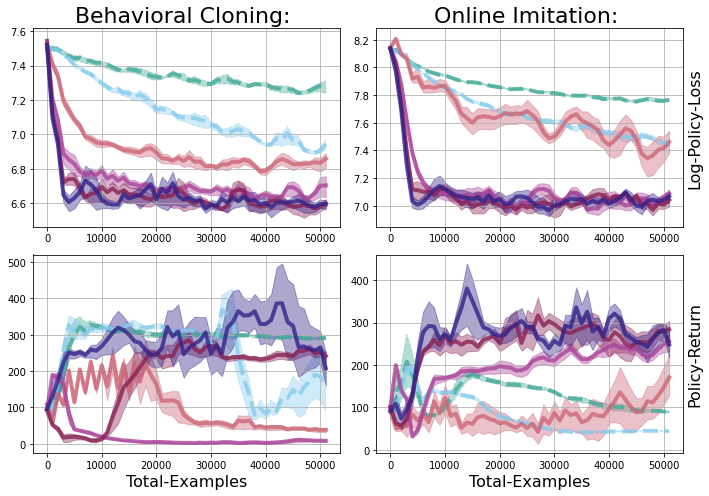

missing OSls   Hopper-v2 1
missing OSls   Hopper-v2 0


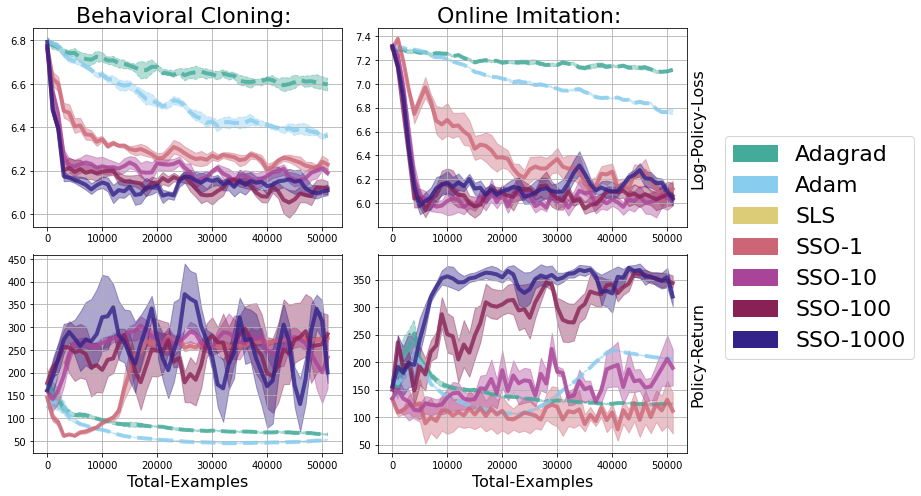

In [142]:
generate_mujoco_figure(wandb_records, fig_name='Walker2d', include_leg=False)
generate_mujoco_figure(wandb_records, env_name='Hopper-v2', fig_name='Legend_fig', include_leg=True)

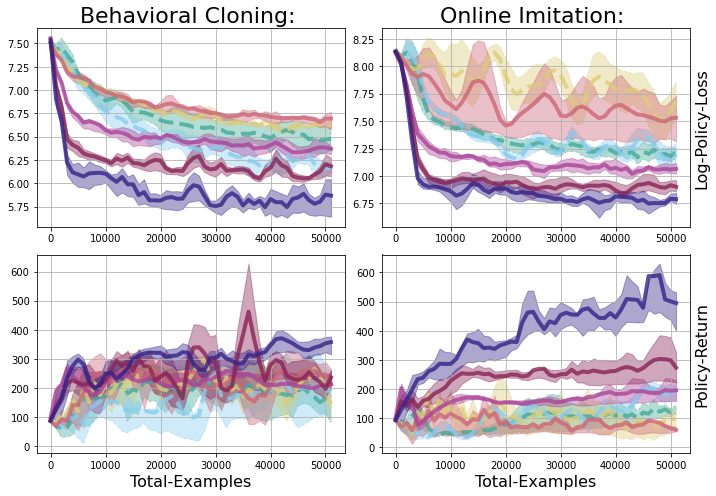

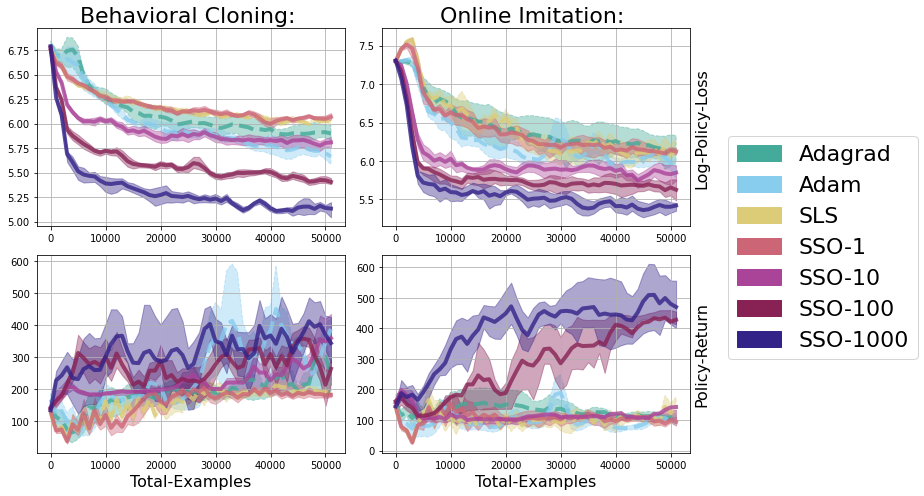

In [141]:
generate_mujoco_figure(wandb_records, fig_name='Walker2d', model_type='nn', include_leg=False)
generate_mujoco_figure(wandb_records, env_name='Hopper-v2', model_type='nn', fig_name='Legend_fig', include_leg=True)